# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [7]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 18345 files belonging to 10 classes.


### Validation Image Preprocessing

In [10]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4585 files belonging to 10 classes.


In [12]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [14]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[113.75 104.75 109.75]
   [111.75 102.75 107.75]
   [110.   101.   106.  ]
   ...
   [106.5   96.5   95.5 ]
   [111.   101.   100.  ]
   [110.75 100.75  99.75]]

  [[114.75 105.75 110.75]
   [109.75 100.75 105.75]
   [107.25  98.25 103.25]
   ...
   [115.   105.   104.  ]
   [115.   105.   104.  ]
   [121.   111.   110.  ]]

  [[115.25 106.25 111.25]
   [113.5  104.5  109.5 ]
   [114.   105.   110.  ]
   ...
   [116.75 106.75 105.75]
   [110.25 100.25  99.25]
   [113.75 103.75 102.75]]

  ...

  [[149.5  142.5  149.5 ]
   [152.   145.   152.  ]
   [147.25 140.25 147.25]
   ...
   [155.5  146.5  149.5 ]
   [155.   146.   149.  ]
   [153.25 144.25 147.25]]

  [[144.   137.   144.  ]
   [149.25 142.25 149.25]
   [150.75 143.75 150.75]
   ...
   [156.   147.   150.  ]
   [156.25 147.25 150.25]
   [157.   148.   151.  ]]

  [[144.25 137.25 144.25]
   [145.25 138.25 145.25]
   [144.5  137.5  144.5 ]
   ...
   [156.   147.   150.  ]
   [156.75 147.75 150.75]
   [155.   146.   14

## Building Model

In [64]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Input,Flatten,Dropout
from keras.models import Sequential

In [66]:
model = Sequential()

In [68]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [70]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [72]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [74]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [76]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [78]:
model.add(Dropout(0.25))

In [80]:
model.add(Flatten())

In [82]:
model.add(Dense(units=1500,activation='relu'))

In [84]:
model.add(Dropout(0.4))

In [86]:
#Output Layer
model.add(Dense(units=10,activation='softmax'))

### Compiling and Training Phase

In [89]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [91]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        15,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,800,734 (29.76 MB)

 Trainable params: 7,800,734 (29.76 MB)

 Non-trainable params: 0 (0.00 B)

### Training Model

In [94]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 406s 702ms/step - accuracy: 0.1073 - loss: 2.5686 - val_accuracy: 0.1710 - val_loss: 2.1913
Epoch 2/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 385s 671ms/step - accuracy: 0.2792 - loss: 1.8938 - val_accuracy: 0.5736 - val_loss: 1.2069
Epoch 3/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 385s 670ms/step - accuracy: 0.5927 - loss: 1.1420 - val_accuracy: 0.6947 - val_loss: 0.8753
Epoch 4/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 385s 670ms/step - accuracy: 0.7279 - loss: 0.7612 - val_accuracy: 0.7712 - val_loss: 0.6655
Epoch 5/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 385s 670ms/step - accuracy: 0.7834 - loss: 0.6025 - val_accuracy: 0.8098 - val_loss: 0.5178
Epoch 6/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 385s 671ms/step - accuracy: 0.8204 - loss: 0.5003 - val_accuracy: 0.8122 - val_loss: 0.5229
Epoch 7/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 385s 670ms/step - accuracy: 0.8397 - loss: 0.4499 - val_accuracy: 0.8486 - val_loss: 0.4207
Epoch 8/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 362s 630ms/step - accuracy: 0.8526 -

## Evaluating Model

In [97]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

574/574 ━━━━━━━━━━━━━━━━━━━━ 171s 296ms/step - accuracy: 0.9292 - loss: 0.2018
Training accuracy: 0.9389479160308838


In [98]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

144/144 ━━━━━━━━━━━━━━━━━━━━ 40s 279ms/step - accuracy: 0.8830 - loss: 0.3561
Validation accuracy: 0.881788432598114


### Saving Model

In [100]:
model.save('trained_plant_disease_model.keras')

In [101]:
training_history.history #Return Dictionary of history

{'accuracy': [0.11082039028406143,
  0.38882529735565186,
  0.6371763348579407,
  0.7475606203079224,
  0.793404221534729,
  0.8267647624015808,
  0.8468247652053833,
  0.8563095927238464,
  0.8772962689399719,
  0.8896157145500183],
 'loss': [2.3417680263519287,
  1.6238514184951782,
  1.019408106803894,
  0.7050076723098755,
  0.5763636827468872,
  0.4854171574115753,
  0.4254603087902069,
  0.3984055519104004,
  0.3483814597129822,
  0.31392979621887207],
 'val_accuracy': [0.17099235951900482,
  0.5736095905303955,
  0.694656491279602,
  0.7712104916572571,
  0.8098146319389343,
  0.8122137188911438,
  0.8486368656158447,
  0.8663031458854675,
  0.8752453923225403,
  0.881788432598114],
 'val_loss': [2.191279888153076,
  1.2069082260131836,
  0.8753412365913391,
  0.6654844880104065,
  0.5178029537200928,
  0.5229128003120422,
  0.420746773481369,
  0.390838086605072,
  0.3716523051261902,
  0.34408387541770935]}

In [102]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [103]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

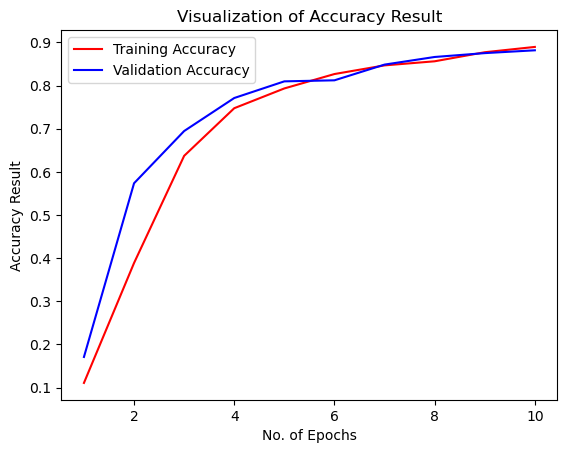

In [105]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Result')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [108]:
class_name = validation_set.class_names

In [109]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4585 files belonging to 10 classes.


In [117]:
y_pred = model.predict(test_set)
y_pred.shape
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

4585/4585 ━━━━━━━━━━━━━━━━━━━━ 134s 29ms/step


<tf.Tensor: shape=(4585,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9], dtype=int64)>

In [119]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(4585,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9], dtype=int64)>

In [120]:
Y_true

<tf.Tensor: shape=(4585,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9], dtype=int64)>

In [121]:
predicted_categories

<tf.Tensor: shape=(4585,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9], dtype=int64)>

In [123]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(10, 10)

In [124]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.92      0.90      0.91       425
                        Tomato___Early_blight       0.82      0.82      0.82       480
                         Tomato___Late_blight       0.88      0.78      0.82       463
                           Tomato___Leaf_Mold       0.88      0.88      0.88       470
                  Tomato___Septoria_leaf_spot       0.78      0.80      0.79       436
Tomato___Spider_mites Two-spotted_spider_mite       0.86      0.90      0.88       435
                         Tomato___Target_Spot       0.86      0.81      0.83       457
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.92      0.97      0.94       490
                 Tomato___Tomato_mosaic_virus       0.92      0.98      0.95       448
                             Tomato___healthy       0.97      0.97      0.97       481

                                     accu

### Confusion Matrix Visualization

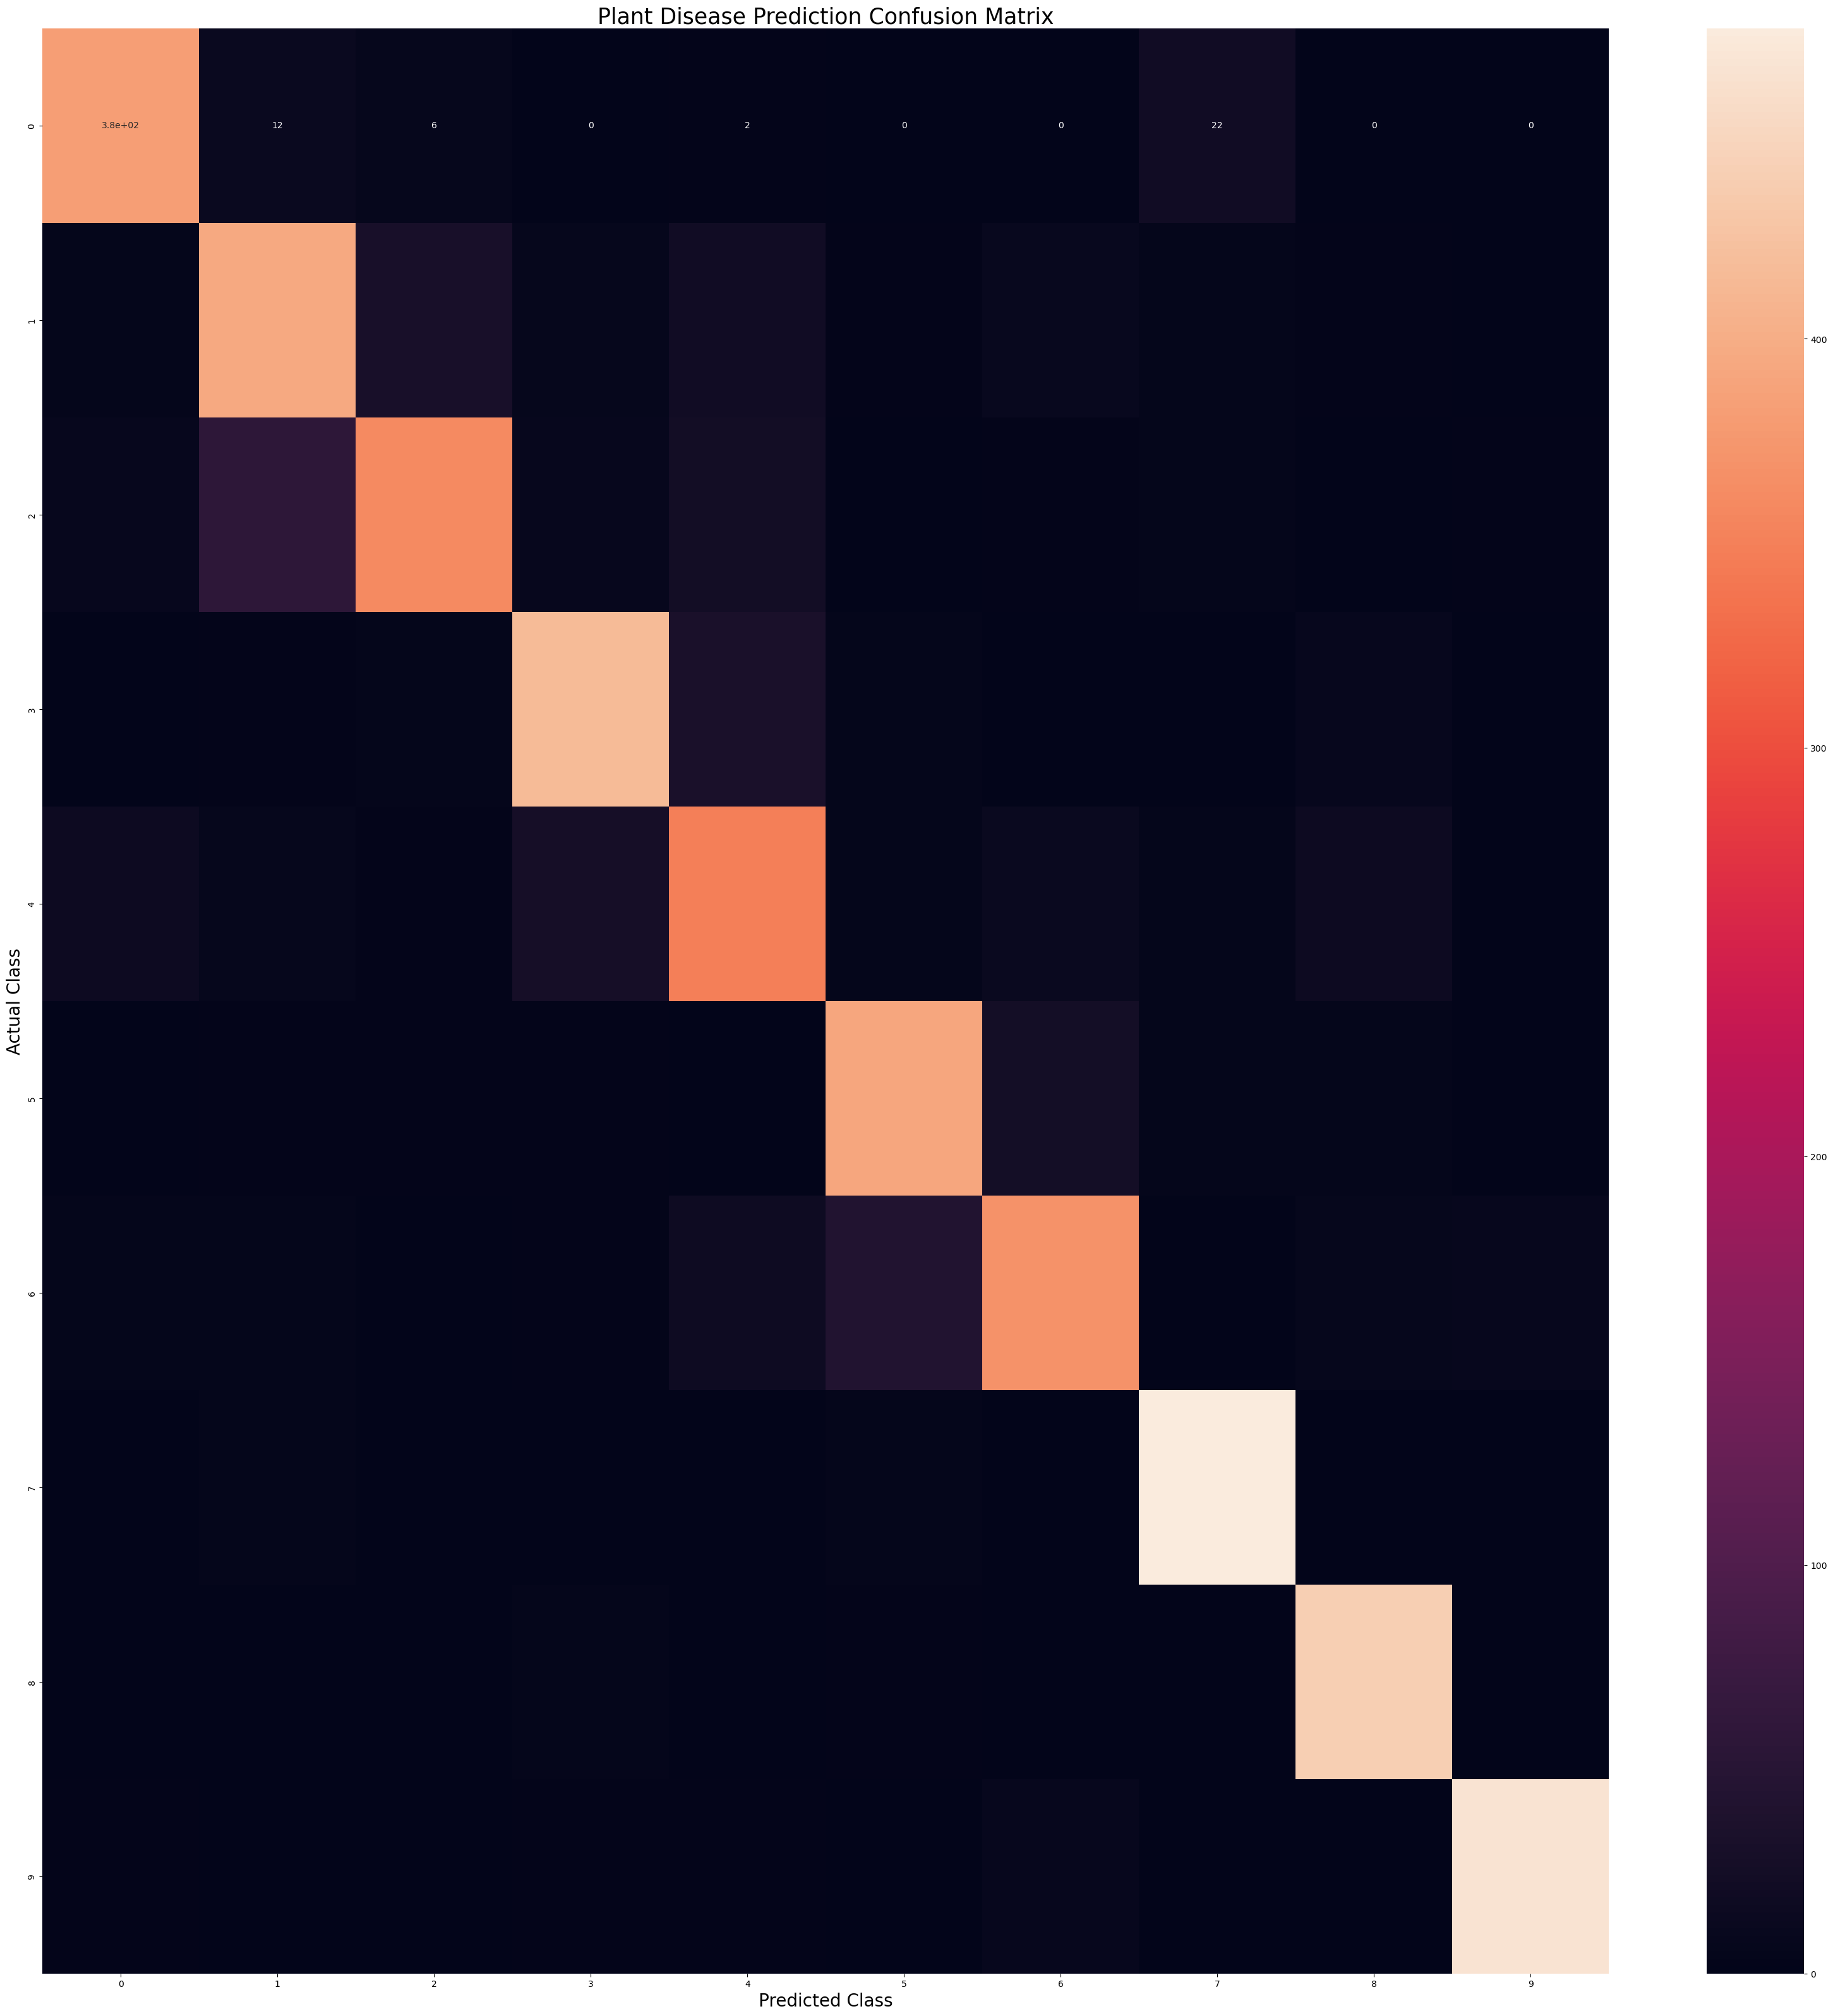

In [127]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()